In [ ]:
#import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import re

# **IMPORTING DATASET**

In [ ]:
#Declare variable and get data from "Property List in Kuala Lumpur"
sheet_url = 'https://docs.google.com/spreadsheets/d/1GuIO2t-Og2EyWHBovYRnCDRk8ISsegbAtkFQRVb5U7Y/edit#gid=994179040'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_listproperty = pd.read_csv(sheet_url_trf)
df_listproperty

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur","RM 5,100,000",5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,"Bangsar, Kuala Lumpur","RM 5,000,000",5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,"Bangsar, Kuala Lumpur","RM 5,500,000",5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,"Wangsa Maju, Kuala Lumpur","RM 480,000",3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


In [ ]:
df_listproperty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


**Findings:**

Dari informasi Data Type yang ada kita bisa melihat masih terdapat format string di dalam nilai Price, Rooms dan Size. Hal ini perlu diubah ke dalam numerik agar dapat dilakukan analisis statistik numerik.

# **DATA CLEANING**

In [ ]:
#Handling duplicate values
duplicate = df_listproperty[df_listproperty.duplicated()]
duplicate

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
12,"Taman Tun Dr Ismail, Kuala Lumpur","RM 1,700,000",3+1,3.0,NaN,2-sty Terrace/Link House (Intermediate),Land area : 1900 sq. ft.,Partly Furnished
14,"Bukit Jalil, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,"Mont Kiara, Kuala Lumpur","RM 1,500,000",3+1,4.0,3.0,Condominium,"Built-up : 2,163 sq. ft.",Fully Furnished
...,...,...,...,...,...,...,...,...
53488,"Sentul, Kuala Lumpur","RM 430,000",4,2.0,2.0,Condominium,"Built-up : 1,184 sq. ft.",Partly Furnished
53490,"Batu Caves, Kuala Lumpur","RM 380,000",3,2.0,NaN,Condominium,"Built-up : 1,130 sq. ft.",Partly Furnished
53496,"Segambut, Kuala Lumpur","RM 650,000",3,3.0,2.0,Condominium,"Built-up : 1,155 sq. ft.",Partly Furnished
53497,"Segambut, Kuala Lumpur","RM 700,000",3+1,3.0,2.0,Condominium,"Built-up : 1,300 sq. ft.",Partly Furnished


Dapat dilihat terdapat 4.467 data duplikat pada dataset ini. Dikarenakan tidak terdapat kolom unik seperti property ID, kemungkinan data memiliki nilai yang sama sangat bisa terjadi. Sehingga nilai duplikat saat ini diasumsikan sebagai data yang unik dan tidak dihilangkan.   

In [ ]:
#Checking Null Value
pd.isnull(df_listproperty).sum()

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

**Price Column**

In [ ]:
df_listproperty[df_listproperty['Price'].isnull()]

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Seputeh, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"Ampang Hilir, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,"Bukit Jalil, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,"Sungai Besi, Kuala Lumpur",NaN,5,4.0,NaN,3-sty Terrace/Link House (Intermediate),Land area : 20x75 sq. ft.,Fully Furnished
...,...,...,...,...,...,...,...,...
53075,"Mont Kiara, Kuala Lumpur",NaN,3+1,3.0,NaN,Condominium,"Built-up : 1,600 sq. ft.",NaN
53081,"Sentul, Kuala Lumpur",NaN,3+1,4.0,1.0,Condominium,"Built-up : 1,147 sq. ft.",Partly Furnished
53082,"Sentul, Kuala Lumpur",NaN,2+1,3.0,1.0,Condominium,Built-up : 999 sq. ft.,Fully Furnished
53083,"Sentul, Kuala Lumpur",NaN,2,2.0,1.0,Condominium,Built-up : 781 sq. ft.,Fully Furnished


Terdapat 248 data yang memiliki nilai Price Null, karena data tersebut hanya sekitar 0,5% dari total data maka data tersebut dapat dihilangkan dan tidak berpengaruh signifikan pada keseluruhan data. 

In [ ]:
#Remove null value in Price Column
df_listproperty = df_listproperty.loc[~df_listproperty["Price"].isna()]
df_listproperty[df_listproperty['Price'].isnull()] 

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing


In [ ]:
#Cleaning Price Column so we can get only numbers and convert to integer data type
df_listproperty['Price']=df_listproperty['Price'].str.strip().str.replace('RM', '').str.replace(',', '')
df_listproperty['Price'] = df_listproperty['Price'].astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


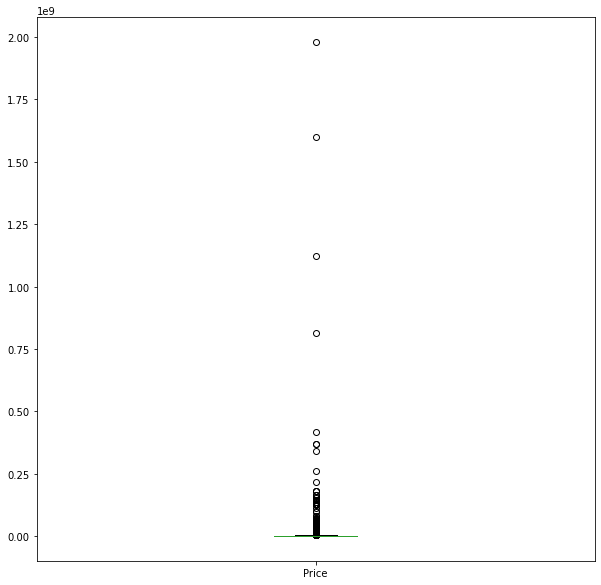

In [ ]:
#Checking Outlier Value in Price Column
df_listproperty.boxplot(column='Price', fontsize=10, rot=0, grid=False, figsize=(10,10))

Dari visualisasi boxplot di atas, terdapat data yang berada di luar kotak boxplot dan diasumsikan sebagai nilai outlier. Perlu dilakukan filtering nilai outlier tersebut untuk dikeluarkan dari perhitungan analisis selanjutnya. 

In [ ]:
#Calculate IQR Stats (Price Column)

c_q1 = df_listproperty['Price'].quantile(0.25)
c_q3 = df_listproperty['Price'].quantile(0.75)
c_iqr = c_q3 - c_q1
boxplot_c_min = c_q1 - 3 * c_iqr
boxplot_c_max = c_q3 + 3 * c_iqr
print('Q1: ', c_q1)
print('Q3: ', c_q3)
print('IQR: ', c_iqr)
print('Min: ', boxplot_c_min)
print('Max: ', boxplot_c_max)

Q1:  580000.0
Q3:  1996400.0
IQR:  1416400.0
Min:  -3669200.0
Max:  6245600.0


Mendefinisikan batas minimum dan maksimum nilai Price berdasarkan metode Interquantile Range. Analis menggunakan koefisien nilai 3 tidak seperti formula IQR pada umumnya 1,5. Hal ini dikarenakan masih banyaknya jumlah data yang menjadi outlier pada koefisien 1,5 sehingga toleransi batas minimum dan maksimumnya diperlebar menjadi 3. 

In [ ]:
#exclude outlier in Price column
df_priceout = df_listproperty[(df_listproperty['Price'] <= boxplot_c_min) | (df_listproperty['Price'] > boxplot_c_max)]
df_priceout

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
1,"Damansara Heights, Kuala Lumpur",6800000,6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
16,"Bukit Tunku (Kenny Hills), Kuala Lumpur",9000000,6+1,7.0,4.0,Bungalow (Corner),Land area : 8500 sq. ft.,Partly Furnished
107,"Damansara Heights, Kuala Lumpur",6800000,5+2,7.0,NaN,Bungalow,Land area : 7000 sq. ft.,NaN
141,"Country Heights Damansara, Kuala Lumpur",9500000,6+1,7.0,6.0,Bungalow (Corner),Land area : 10000 sq. ft.,Partly Furnished
142,"KLCC, Kuala Lumpur",8343600,3,3.0,2.0,Condominium (Intermediate),"Built-up : 2,454 sq. ft.",NaN
...,...,...,...,...,...,...,...,...
53721,"Damansara Heights, Kuala Lumpur",6670888,5+1,6.0,NaN,Semi-detached House (EndLot),Land area : 24x85 sq. ft.,Partly Furnished
53743,"Seputeh, Kuala Lumpur",6380000,7+1,8.0,NaN,Bungalow (Corner),Land area : 7125 sq. ft.,Partly Furnished
53777,"Setapak, Kuala Lumpur",15600000,NaN,NaN,NaN,Residential Land (Intermediate),Land area : 2.117 acres,Unfurnished
53828,"Titiwangsa, Kuala Lumpur",8000000,7,6.0,6.0,Bungalow (Corner),Land area : 9795 sq. ft.,Partly Furnished


Sekitar 4,6% data dinyatakan sebagai outlier, sehingga tidak dijadikan dasar perhitungan analisis selanjutnya.

In [ ]:
df_listproperty = df_listproperty[(df_listproperty['Price'] >= boxplot_c_min) & (df_listproperty['Price'] < boxplot_c_max)]
df_listproperty

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
2,"Dutamas, Kuala Lumpur",1030000,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur",900000,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000,5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished
...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur",5100000,5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,"Bangsar, Kuala Lumpur",5000000,5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,"Bangsar, Kuala Lumpur",5500000,5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,"Wangsa Maju, Kuala Lumpur",480000,3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


In [ ]:
df_listproperty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50995 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       50995 non-null  object 
 1   Price          50995 non-null  int64  
 2   Rooms          49842 non-null  object 
 3   Bathrooms      49567 non-null  float64
 4   Car Parks      35025 non-null  float64
 5   Property Type  50995 non-null  object 
 6   Size           49996 non-null  object 
 7   Furnishing     44739 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.5+ MB


**Location Column**

In [ ]:
#Handling typos
df_listproperty['Location'].unique() #make sure all words using lower case to prevent typos

array(['KLCC, Kuala Lumpur', 'Dutamas, Kuala Lumpur',
       'Bukit Jalil, Kuala Lumpur', 'Taman Tun Dr Ismail, Kuala Lumpur',
       'Sri Petaling, Kuala Lumpur', 'Damansara Heights, Kuala Lumpur',
       'Mont Kiara, Kuala Lumpur', 'Desa ParkCity, Kuala Lumpur',
       'Bangsar South, Kuala Lumpur', 'Ampang Hilir, Kuala Lumpur',
       'Kepong, Kuala Lumpur',
       'Jalan Klang Lama (Old Klang Road), Kuala Lumpur',
       'Sungai Besi, Kuala Lumpur', 'KL City, Kuala Lumpur',
       'KL Sentral, Kuala Lumpur', 'Taman Melawati, Kuala Lumpur',
       'Setapak, Kuala Lumpur', 'City Centre, Kuala Lumpur',
       'Taman Desa, Kuala Lumpur', 'Sentul, Kuala Lumpur',
       'Cheras, Kuala Lumpur', 'Bangsar, Kuala Lumpur',
       'Segambut, Kuala Lumpur', 'Batu Caves, Kuala Lumpur',
       'Wangsa Maju, Kuala Lumpur', 'Ampang, Kuala Lumpur',
       'Klcc, Kuala Lumpur', 'Bukit Kiara, Kuala Lumpur',
       'Setiawangsa, Kuala Lumpur', 'OUG, Kuala Lumpur',
       'Bukit Bintang, Kuala Lumpur', 

In [ ]:
df_listproperty["Location"] = df_listproperty["Location"].str.lower()
df_listproperty['Location'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


mont kiara, kuala lumpur                           5651
klcc, kuala lumpur                                 4998
cheras, kuala lumpur                               4453
jalan klang lama (old klang road), kuala lumpur    2835
setapak, kuala lumpur                              2694
                                                   ... 
semarak, kuala lumpur                                 1
duta nusantara, kuala lumpur                          1
landed sd, kuala lumpur                               1
ukay heights, kuala lumpur                            1
petaling jaya, kuala lumpur                           1
Name: Location, Length: 98, dtype: int64

**Rooms Column**

In [ ]:
#string manipulation to get numeric value in Rooms column
df_listproperty['Rooms'].unique()

array(['2+1', '3', '4+1', '4+2', '5', '4', '3+1', '6+1', '5+1', '3+2',
       '1', '2', '6', '1+1', '2+2', '7+1', '5+2', nan, 'Studio', '7', '8',
       '1+2', '8+1', '10', '6+', '9', '7+', '9+1', '8+', '18', '10+',
       '20 Above', '11', '12', '10+1', '12+', '9+', '11+1'], dtype=object)

In [ ]:
def convert_room_num(rooms):
    try:
        if rooms.endswith("+"):
            return int(rooms[:-1])
        if re.search("[0-9]+\+[0-9]+", rooms) is not None:
            tmp = rooms.split("+")
            return int(tmp[0]) + int(tmp[1])
        if rooms == "20 Above":
            return 20
        if rooms == "Studio":
            return 1
        return int(rooms)
    except AttributeError:
        return rooms

df_listproperty["Room_Number"] = df_listproperty["Rooms"].apply(convert_room_num)

Dilakukan string manipulation untuk menghilangkan nilai positif pada kolom rooms. Diasumsikan bahwa karakter + menjadi beberapa fungsi, diantaranya:
1. merupakan sebuah operasi penjumlahan, apabila berbentuk format (angka) + (angka)
2. merupakan indikasi lebih dari nilai sebelumnya seperti (angka)+, maka diasumsikan angka awal saja yang diambil.

Untuk nilai data 'Studio' diasumsikan hanya 1 kamar, '20 above' menjadi 20, dan apabila terdapat bentuk data diluar format tersebut fungsinya akan menjadi error. 

In [ ]:
df_listproperty['Room_Number'].unique()

array([ 3.,  5.,  6.,  4.,  7.,  1.,  2.,  8., nan,  9., 10., 18., 20.,
       11., 12.])

In [ ]:
#Handling missing value in Room Number Column with median value
df_listproperty['Room_Number'].fillna(
    df_listproperty['Room_Number'].median(),axis=0,inplace=True)

**Bathrooms Column**

In [ ]:
df_listproperty['Bathrooms'].unique()

array([ 3.,  4.,  5.,  2.,  7.,  6.,  1.,  9.,  8., nan, 20., 10., 14.,
       12., 11., 15.])

In [ ]:
#Handling missing value in Bathrooms Column with median value
df_listproperty['Bathrooms'].fillna(
    df_listproperty['Bathrooms'].median(),axis=0,inplace=True)

Clean

**Car Parks Column**

In [ ]:
df_listproperty['Car Parks'].unique()

array([ 2.,  4.,  3.,  1., nan,  5.,  6.,  7.,  9.,  8., 10., 13., 15.,
       20., 24., 12., 30., 11.])

In [ ]:
#Handling missing value in Car Parks Column with median value
df_listproperty['Car Parks'].fillna(
    df_listproperty['Car Parks'].median(),axis=0,inplace=True)

Clean

**Property Type Column**

In [ ]:
df_listproperty['Property Type'].unique()

array(['Serviced Residence', 'Condominium (Corner)', 'Bungalow',
       'Semi-detached House', '2-sty Terrace/Link House (EndLot)',
       'Apartment (Intermediate)',
       '2-sty Terrace/Link House (Intermediate)',
       'Bungalow (Intermediate)', 'Semi-detached House (Intermediate)',
       'Bungalow (Corner)', 'Serviced Residence (Intermediate)',
       'Condominium', 'Condominium (Intermediate)',
       'Condominium (EndLot)', 'Serviced Residence (Corner)',
       '3-sty Terrace/Link House (Intermediate)',
       'Serviced Residence (Duplex)', '2-sty Terrace/Link House',
       '2-sty Terrace/Link House (Corner)',
       '2.5-sty Terrace/Link House (Intermediate)',
       '3-sty Terrace/Link House (Corner)',
       '3-sty Terrace/Link House (EndLot)',
       '3.5-sty Terrace/Link House (Intermediate)',
       'Serviced Residence (Penthouse)', 'Condominium (Studio)',
       '1-sty Terrace/Link House (Intermediate)',
       '1.5-sty Terrace/Link House (EndLot)', 'Apartment',
      

In [ ]:
df_listproperty['Property Type'].value_counts()

Condominium                               11275
Serviced Residence                         7123
Condominium (Corner)                       5548
Condominium (Intermediate)                 5087
Serviced Residence (Intermediate)          3259
                                          ...  
2-sty Terrace/Link House (Penthouse)          1
3-sty Terrace/Link House (Triplex)            1
4.5-sty Terrace/Link House (Corner)           1
4-sty Terrace/Link House (Penthouse)          1
2.5-sty Terrace/Link House (Penthouse)        1
Name: Property Type, Length: 95, dtype: int64

Pada nilai kolom Property Type, terdapat 95 jenis tiper properti yang secara garis besar dapat disimplifikasi menjadi grup yang lebih umum. Maka dilakukan grouping menggunakan string manipulation untuk mendapatkan tipe properti yang lebih umum. Untuk simplifikasi tipe properti ditetapkan beberapa tipe yaitu:
1. Terrace/Link House
2. Serviced Residence
3. Condominium
4. Semi-detached House
5. Bungalow 
6. Apartment
7. Townhouse
8. Flat
9. Residential Land 
10. Cluster House


In [ ]:
#There is common type in Property Type, we generalized to smaller of group 
def simplify_property_type(prop_type):
    group_types = [
        "Terrace/Link House", "Serviced Residence", "Condominium", 
        "Semi-detached House", "Bungalow", "Apartment", "Townhouse", 
        "Flat", "Residential Land", "Cluster House"]
    for group_type in group_types:
        if re.search(group_type, prop_type, flags=re.IGNORECASE) is not None:
            return group_type
    
    return prop_type

df_listproperty["Property_Type_Grouping"] = df_listproperty["Property Type"].apply(simplify_property_type)

In [ ]:
df_listproperty['Property_Type_Grouping'].value_counts()

Condominium            22748
Serviced Residence     13260
Terrace/Link House      7777
Bungalow                2115
Semi-detached House     2109
Apartment               1673
Townhouse                547
Residential Land         384
Flat                     373
Cluster House              9
Name: Property_Type_Grouping, dtype: int64

**Size Column**

In [ ]:
df_listproperty['Size'].value_counts()

Land area : 22x75 sq. ft.    614
Built-up : 1,100 sq. ft.     540
Built-up : 950 sq. ft.       495
Built-up : 1,200 sq. ft.     380
Built-up : 850 sq. ft.       379
                            ... 
Land area : 1095 sq. ft.       1
Land area : 2073 sq. ft.       1
Built-up : 2,348 sq. ft.       1
Land area : 31x85 sq. ft.      1
Land area : 5243 sq. ft.       1
Name: Size, Length: 5521, dtype: int64

Step pertama yang dilakukan memisahkan karakter tipe luasan properti berupa land area/ built-up menjadi kolom terpisah dengan angka luasan

In [ ]:
def split_size(val, index=0):
    try:
        return val.split(":")[index].strip()
    except AttributeError:
        return val
    
df_listproperty["Size_Type"] = df_listproperty["Size"].apply(split_size, index=0)
df_listproperty["Size_Sqft"] = df_listproperty["Size"].apply(split_size, index=1)

In [ ]:
df_listproperty['Size_Type'].value_counts()

Built-up     37064
Land area    12932
Name: Size_Type, dtype: int64

In [ ]:
df_listproperty['Size_Sqft'].unique()

array(['1,335 sq. ft.', '1,875 sq. ft.', '1,513 sq. ft.', ...,
       '1157 sq. ft.', '10250 sq. ft.', '1544 sq. ft.'], dtype=object)

In [ ]:
def convert_size_num(size):
    try:
        if re.search(r"sq\.*\s*ft\.*", size) is None:
            return None
        size = size.replace(",", "")
        size = size.replace("'", "")
        size = size.replace("sq. ft.", "")
        size = size.replace("sf", "")
        size = size.strip()
        size = size.lower()
        #replace special character with blank so we can get just numeric number

        add_mult_match = re.search(r"(\d+)\s*\+\s*(\d+)\s*(?:x|\*)\s*(\d+)", size)
        if add_mult_match is not None:
            return int(add_mult_match.groups()[0]) + (
                int(add_mult_match.groups()[1]) * 
                int(add_mult_match.groups()[2]))
        
        mult_match = re.search(r"(\d+)\s*(?:x|\*)\s*(\d+)", size)
        if mult_match is not None:
            return int(mult_match.groups()[0]) * int(mult_match.groups()[1])
        return int(size)
        #calculate numeric number with operator function to get total number of area
    except:
        return None
        #return NaN if data has different format which defined in formula

df_listproperty["Size_Sqft"] = df_listproperty["Size_Sqft"].apply(convert_size_num)
#credit to: Jan S - https://www.kaggle.com/dragonduck/property-listing-analysis/notebook

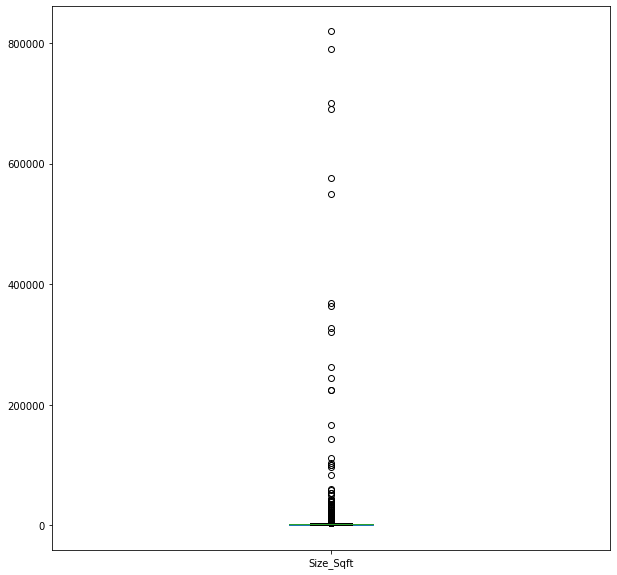

In [ ]:
df_listproperty.boxplot(column='Size_Sqft', fontsize=10, rot=0, grid=False, figsize=(10,10))

In [ ]:
#Calculate IQR Stats (Size_Sqft Column)

c_q1 = df_listproperty['Size_Sqft'].quantile(0.25)
c_q3 = df_listproperty['Size_Sqft'].quantile(0.75)
c_iqr = c_q3 - c_q1
boxplot_c_min = c_q1 - 3 * c_iqr
boxplot_c_max = c_q3 + 3 * c_iqr
print('Q1: ', c_q1)
print('Q3: ', c_q3)
print('IQR: ', c_iqr)
print('Min: ', boxplot_c_min)
print('Max: ', boxplot_c_max)

Q1:  1003.0
Q3:  2115.25
IQR:  1112.25
Min:  -2333.75
Max:  5452.0


In [ ]:
#exclude outlier in Size_Sqft column
df_sizeout = df_listproperty[(df_listproperty['Size_Sqft'] <= boxplot_c_min) | (df_listproperty['Size_Sqft'] > boxplot_c_max)]
df_sizeout

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Room_Number,Property_Type_Grouping,Size_Type,Size_Sqft
5,"taman tun dr ismail, kuala lumpur",5350000,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,6.0,Bungalow,Land area,7200.0
13,"taman tun dr ismail, kuala lumpur",4580000,6+1,5.0,5.0,Bungalow (Intermediate),Land area : 6000 sq. ft.,Partly Furnished,7.0,Bungalow,Land area,6000.0
96,"taman tun dr ismail, kuala lumpur",4995000,5+1,7.0,6.0,Bungalow,Land area : 8113 sq. ft.,Partly Furnished,6.0,Bungalow,Land area,8113.0
165,"desa parkcity, kuala lumpur",5600000,7+1,9.0,2.0,3.5-sty Terrace/Link House (Intermediate),"Built-up : 7,000 sq. ft.",Partly Furnished,8.0,Terrace/Link House,Built-up,7000.0
187,"taman tun dr ismail, kuala lumpur",5350000,6,5.0,3.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,6.0,Bungalow,Land area,7200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53830,"titiwangsa, kuala lumpur",2600000,5+1,5.0,4.0,Bungalow (Corner),Land area : 6050 sq. ft.,Partly Furnished,6.0,Bungalow,Land area,6050.0
53861,"seputeh, kuala lumpur",4100000,NaN,2.0,2.0,Residential Land (Corner),Land area : 10250 sq. ft.,NaN,3.0,Residential Land,Land area,10250.0
53878,"bangsar, kuala lumpur",5100000,5+1,4.0,2.0,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished,6.0,Bungalow,Land area,7168.0
53879,"bangsar, kuala lumpur",5000000,5,4.0,2.0,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished,5.0,Bungalow,Land area,15000.0


In [ ]:
df_listproperty[df_listproperty['Size_Sqft'].isnull()]

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Room_Number,Property_Type_Grouping,Size_Type,Size_Sqft
220,"batu caves, kuala lumpur",468000,3,2.0,2.0,Serviced Residence,NaN,Partly Furnished,3.0,Serviced Residence,NaN,NaN
239,"wangsa maju, kuala lumpur",350000,3,2.0,2.0,Serviced Residence,NaN,Partly Furnished,3.0,Serviced Residence,NaN,NaN
288,"klcc, kuala lumpur",1158200,1,1.0,1.0,Condominium (Intermediate),NaN,Partly Furnished,1.0,Condominium,NaN,NaN
304,"klcc, kuala lumpur",1420000,2,2.0,1.0,Condominium,NaN,NaN,2.0,Condominium,NaN,NaN
348,"ampang, kuala lumpur",560000,1,1.0,1.0,Serviced Residence,NaN,Partly Furnished,1.0,Serviced Residence,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
53662,"bukit jalil, kuala lumpur",1050000,3,3.0,2.0,Condominium (Corner),"Built-up : 1,301 sq. m.",Partly Furnished,3.0,Condominium,Built-up,NaN
53673,"sri hartamas, kuala lumpur",3700000,4+1,5.0,3.0,Condominium (Corner),NaN,Partly Furnished,5.0,Condominium,NaN,NaN
53825,"ampang, kuala lumpur",2290000,5+1,6.0,2.0,Bungalow (Intermediate),Land area : 1 acre sq. ft.,Unfurnished,6.0,Bungalow,Land area,NaN
53870,"damansara heights, kuala lumpur",3500000,NaN,2.0,2.0,Bungalow,NaN,NaN,3.0,Bungalow,NaN,NaN


In [ ]:
df_listproperty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50995 entries, 0 to 53882
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                50995 non-null  object 
 1   Price                   50995 non-null  int64  
 2   Rooms                   49842 non-null  object 
 3   Bathrooms               50995 non-null  float64
 4   Car Parks               50995 non-null  float64
 5   Property Type           50995 non-null  object 
 6   Size                    49996 non-null  object 
 7   Furnishing              44739 non-null  object 
 8   Room_Number             50995 non-null  float64
 9   Property_Type_Grouping  50995 non-null  object 
 10  Size_Type               49996 non-null  object 
 11  Size_Sqft               49752 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 5.1+ MB


Setelah dilakukan pengecekan statistika deskriptif pada kolom Size, masih banyak ditemukan nilai outlier dan nilai Null sehingga diputuskan untuk sementara kolom ini akan dikeluarkan dari analisis korelasi selanjutnya.

In [ ]:
#remove irrelevant values
df_listproperty.drop('Rooms', axis=1,inplace=True)
df_listproperty.drop('Size', axis=1,inplace=True)
df_listproperty.drop('Property Type', axis=1,inplace=True)

In [ ]:
df_listproperty.head()

,Location,Price,Bathrooms,Car Parks,Furnishing,Room_Number,Property_Type_Grouping,Size_Type,Size_Sqft
0,"klcc, kuala lumpur",1250000,3.0,2.0,Fully Furnished,3.0,Serviced Residence,Built-up,1335.0
2,"dutamas, kuala lumpur",1030000,4.0,2.0,Partly Furnished,3.0,Condominium,Built-up,1875.0
4,"bukit jalil, kuala lumpur",900000,3.0,2.0,Partly Furnished,5.0,Condominium,Built-up,1513.0
5,"taman tun dr ismail, kuala lumpur",5350000,5.0,4.0,Partly Furnished,6.0,Bungalow,Land area,7200.0
7,"taman tun dr ismail, kuala lumpur",2600000,4.0,4.0,Partly Furnished,5.0,Semi-detached House,Land area,3600.0


In [ ]:
df_listproperty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50995 entries, 0 to 53882
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                50995 non-null  object 
 1   Price                   50995 non-null  int64  
 2   Bathrooms               50995 non-null  float64
 3   Car Parks               50995 non-null  float64
 4   Furnishing              44739 non-null  object 
 5   Room_Number             50995 non-null  float64
 6   Property_Type_Grouping  50995 non-null  object 
 7   Size_Type               49996 non-null  object 
 8   Size_Sqft               49752 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.9+ MB


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
df_listproperty[['Price','Room_Number','Bathrooms', 'Car Parks']].describe()

,Price,Room_Number,Bathrooms,Car Parks
count,5.099500e+04,50995.000000,50995.000000,50995.000000
mean,1.380952e+06,3.555015,2.908932,1.937288
std,1.188005e+06,1.381260,1.457622,0.895416
min,1.000000e+01,1.000000,1.000000,1.000000
25%,5.680000e+05,3.000000,2.000000,1.000000
50%,9.300000e+05,3.000000,2.000000,2.000000
75%,1.750000e+06,4.000000,4.000000,2.000000
max,6.220000e+06,20.000000,20.000000,30.000000


**Data Distribution**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb7179d0d0>,
      dtype=object)

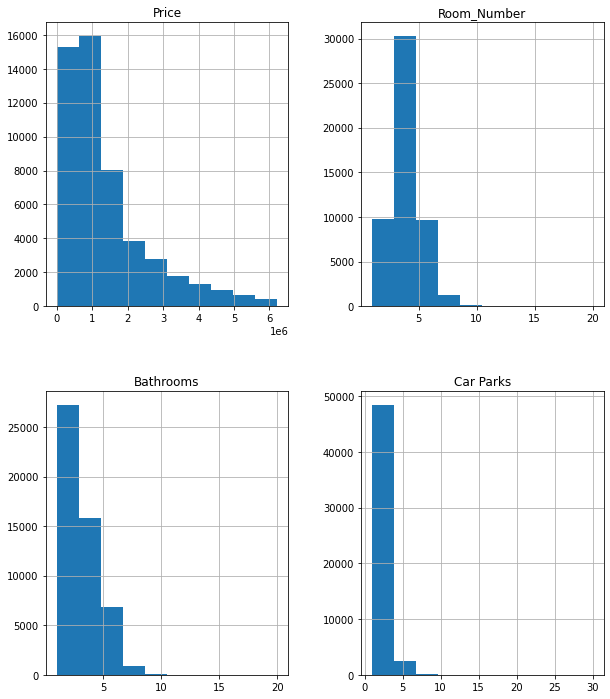

In [ ]:
df_listproperty[['Price', 'Room_Number', 'Bathrooms', 'Car Parks']].hist(figsize=(10,12))

**Findings**:

From histogram visualization and Descriptive Statistics, we know the distribution Price, Room_Number, Bathrooms, and Car Parks is long tail and skewed. But we can generalize Property in Kuala Lumpur mostly has 
1. Price range between RM 580.000 to RM 1.996.400
2. Room Number range between 3 to 4
3. Bathroom Number range between  2 to 4
4. Car Park Number range between 1 to 2

In [ ]:
pd.crosstab(df_listproperty['Location'], df_listproperty['Room_Number'])

Room_Number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,18.0,20.0
Location,,,,,,,,,,,,,,
"adiva desa parkcity, kuala lumpur",0,0,0,1,1,0,0,0,0,0,0,0,0,0
"alam damai, kuala lumpur",0,0,0,1,0,0,0,0,0,0,0,0,0,0
"ampang hilir, kuala lumpur",72,60,57,145,155,21,9,3,0,0,0,0,0,0
"ampang, kuala lumpur",189,191,226,232,127,109,82,17,3,1,0,0,0,0
"bandar damai perdana, kuala lumpur",0,0,17,85,38,6,6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"taming jaya, kuala lumpur",0,0,0,0,1,0,0,0,0,0,0,0,0,0
"titiwangsa, kuala lumpur",5,11,92,4,20,11,4,0,2,0,0,0,0,0
"ukay heights, kuala lumpur",0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(df_listproperty['Property_Type_Grouping'], df_listproperty['Room_Number'])

Room_Number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,18.0,20.0
Property_Type_Grouping,,,,,,,,,,,,,,
Apartment,23,200,1329,113,5,1,2,0,0,0,0,0,0,0
Bungalow,7,0,255,106,442,680,431,141,41,9,1,1,1,0
Cluster House,0,0,1,4,1,3,0,0,0,0,0,0,0,0
Condominium,619,1846,9000,7657,2977,553,84,7,2,1,1,1,0,0
Flat,1,110,257,3,2,0,0,0,0,0,0,0,0,0
Residential Land,11,1,352,3,11,0,2,1,1,0,0,0,0,2
Semi-detached House,0,0,54,131,742,890,261,24,5,2,0,0,0,0
Serviced Residence,2518,4256,4406,1670,338,63,8,0,0,1,0,0,0,0
Terrace/Link House,8,130,1342,3122,1898,963,255,43,9,2,2,3,0,0


In [ ]:
pd.crosstab(df_listproperty['Property_Type_Grouping'], df_listproperty['Size_Type'])

Size_Type,Built-up,Land area
Property_Type_Grouping,,
Apartment,1499,134
Bungalow,169,1925
Cluster House,2,7
Condominium,21078,1235
Flat,333,30
Residential Land,30,347
Semi-detached House,214,1870
Serviced Residence,12260,691
Terrace/Link House,1135,6503


In [ ]:
pd.crosstab(df_listproperty['Property_Type_Grouping'], df_listproperty['Furnishing'])

Furnishing,Fully Furnished,Partly Furnished,Unfurnished,Unknown
Property_Type_Grouping,,,,
Apartment,199,926,253,25
Bungalow,202,1130,305,55
Cluster House,0,6,1,0
Condominium,6367,11427,2176,222
Flat,9,152,98,7
Residential Land,6,11,66,26
Semi-detached House,298,1262,296,25
Serviced Residence,5679,5105,1002,80
Terrace/Link House,761,4701,1269,103


In [ ]:
df_loc = df_listproperty.groupby('Location')['Price'].median().sort_values(ascending=False)
df_loc

Location
bukit damansara, kuala lumpur              4900000
gurney, kuala lumpur                       4700000
bukit kiara, kuala lumpur                  4680000
duta nusantara, kuala lumpur               4450000
country heights damansara, kuala lumpur    4290540
                                            ...   
pandan jaya, kuala lumpur                   430000
jinjang, kuala lumpur                       344000
desa petaling, kuala lumpur                 339500
bandar tasik selatan, kuala lumpur          330000
pandan perdana, kuala lumpur                330000
Name: Price, Length: 98, dtype: int64

**Temuan:**

Dari perbandingan tingkat harga properti dan lokasinya, dapat diketahui bahwa lokasi yang memiliki nilai median tertinggi ada pada wilayah Bukit Damansara dengan nilai properti 4.900.000. Sedangkan yang terendah berada pada wilayah Pandan Perdana dengan nilai 330.000.   

In [ ]:
df_type = df_listproperty.groupby('Property_Type_Grouping')['Price'].median().sort_values(ascending=False)
df_type

Property_Type_Grouping
Bungalow               3950000
Residential Land       3388590
Semi-detached House    2800000
Terrace/Link House     1100000
Cluster House           990000
Townhouse               850000
Condominium             850000
Serviced Residence      810000
Apartment               345000
Flat                    198000
Name: Price, dtype: int64

**Temuan:**

Dari perbandingan tingkat harga properti dan tipe properti, dapat diketahui bahwa tipe properti yang memiliki nilai median tertinggi adalah Bungalow dengan nilai properti 3.950.000. Sedangkan yang terendah adalah Flat dengan nilai 198.000. 

In [ ]:
df_sizetype = df_listproperty.groupby('Size_Type')['Price'].median().sort_values(ascending=False)
df_sizetype

Size_Type
Land area    1380000
Built-up      830000
Name: Price, dtype: int64

**Temuan:**

Dari perbandingan tingkat harga properti dan tipe ukuran, dapat diketahui bahwa tipe ukuran yang memiliki nilai median tertinggi adalah Land area dengan nilai properti 1.380.000 dan yang terendah adalah Built-up dengan nilai 830.000. 

In [ ]:
df_sizenum = df_listproperty.groupby('Size_Sqft')['Price'].median().sort_values(ascending=False)
df_sizenum

Size_Sqft
9870.0     6218100.0
10358.0    6214800.0
5646.0     6210600.0
4277.0     6200000.0
9450.0     6200000.0
             ...    
626.0         2000.0
1217.0        2000.0
21000.0        650.0
12820.0        550.0
10680.0        550.0
Name: Price, Length: 3537, dtype: float64

**Temuan:**

Dari perbandingan tingkat harga properti dan luasan area, dapat diketahui bahwa yang memiliki luasan area dengan nilai median tertinggi adalah luasan area 9870 sq ft dengan nilai properti 6.218.100. Sedangkan yang terendah adalah luasan area 10680 dengan nilai properti 550.

Dapat dilihat dalam perbandingan ini bahwa masih ditemukan adanya nilai yang kurang logis, hal ini dikarenakan adanya kemungkinan nilai outlier atau kesalahan penulisan pada input nilai size.

In [ ]:
df_furnishing = df_listproperty.groupby('Furnishing')['Price'].median().sort_values(ascending=False)
df_furnishing

Furnishing
Fully Furnished     1050000
Partly Furnished     950000
Unknown              775000
Unfurnished          680000
Name: Price, dtype: int64

**Temuan:**

Dari perbandingan tingkat harga properti dan tipe perabotan, dapat diketahui bahwa yang memiliki tipe perabotan dengan nilai median tertinggi adalah perabotan lengkap dengan nilai properti 1.050.000. Sedangkan yang terendah adalah tanpa perabotan dengan nilai properti 680.000.

In [ ]:
# correlation matrix analysis
corr = df_listproperty.corr()
corr

,Price,Bathrooms,Car Parks,Room_Number,Size_Sqft
Price,1.000000,0.658827,0.396735,0.540027,0.135327
Bathrooms,0.658827,1.000000,0.483662,0.830304,0.104406
Car Parks,0.396735,0.483662,1.000000,0.494136,0.082912
Room_Number,0.540027,0.830304,0.494136,1.000000,0.105164
Size_Sqft,0.135327,0.104406,0.082912,0.105164,1.000000


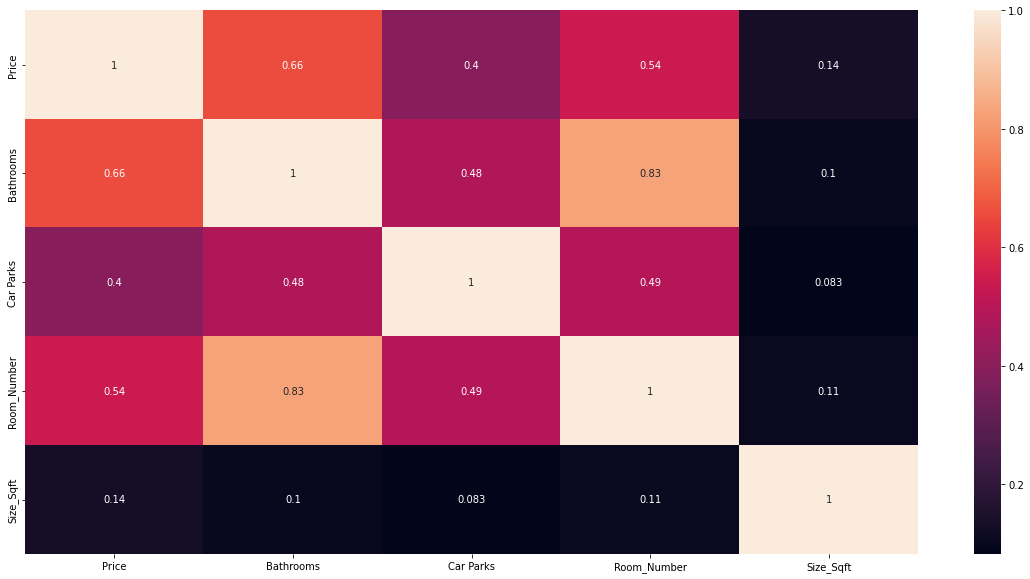

In [ ]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_listproperty.corr(),annot = True)
plt.show()

Dari nilai korelasi di atas, dapat diketahui bahwa terdapat korelasi yang positif antar nilai. Namun korelasi positif paling rendah ada pada nilai Size_Sqft, dikarenakan adanya kemungkinan nilai outlier. 

In [ ]:
df_listproperty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50995 entries, 0 to 53882
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                50995 non-null  object 
 1   Price                   50995 non-null  int64  
 2   Bathrooms               50995 non-null  float64
 3   Car Parks               50995 non-null  float64
 4   Furnishing              44739 non-null  object 
 5   Room_Number             50995 non-null  float64
 6   Property_Type_Grouping  50995 non-null  object 
 7   Size_Type               49996 non-null  object 
 8   Size_Sqft               49752 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.9+ MB


# **CLUSTERING ANALYSIS**

In [ ]:
#Grouping data based on location to perform clustering analysis 
features = ['Price', 'Bathrooms', 'Car Parks', 'Room_Number']

property_data = df_listproperty.dropna(axis=0)[features + ['Location']] #drop null value
property_data.head()

,Price,Bathrooms,Car Parks,Room_Number,Location
0,1250000,3.0,2.0,3.0,"klcc, kuala lumpur"
2,1030000,4.0,2.0,3.0,"dutamas, kuala lumpur"
4,900000,3.0,2.0,5.0,"bukit jalil, kuala lumpur"
5,5350000,5.0,4.0,6.0,"taman tun dr ismail, kuala lumpur"
7,2600000,4.0,4.0,5.0,"taman tun dr ismail, kuala lumpur"


In [ ]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43822 entries, 0 to 53882
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        43822 non-null  int64  
 1   Bathrooms    43822 non-null  float64
 2   Car Parks    43822 non-null  float64
 3   Room_Number  43822 non-null  float64
 4   Location     43822 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
property_group = property_data.groupby('Location').mean().reset_index().dropna(axis=0)
property_group.head()

,Location,Price,Bathrooms,Car Parks,Room_Number
0,"adiva desa parkcity, kuala lumpur",2.150000e+06,4.500000,2.000000,4.500000
1,"alam damai, kuala lumpur",8.800000e+05,4.000000,2.000000,4.000000
2,"ampang hilir, kuala lumpur",2.513116e+06,3.426724,2.116379,3.693966
3,"ampang, kuala lumpur",1.407272e+06,3.188318,2.009063,3.559919
4,"bandar damai perdana, kuala lumpur",8.608826e+05,3.533333,2.177778,4.392593


In [ ]:
property_group.describe()

,Price,Bathrooms,Car Parks,Room_Number
count,9.100000e+01,91.000000,91.000000,91.000000
mean,1.688982e+06,3.515059,2.242449,4.223285
std,1.073754e+06,1.343960,0.886569,1.330613
min,4.500000e+05,1.440994,1.000000,1.687500
25%,8.499422e+05,2.548705,1.815337,3.376222
50%,1.330000e+06,3.022117,2.000000,3.949959
75%,2.359416e+06,4.124575,2.226320,4.985075
max,4.900000e+06,7.000000,6.000000,8.000000


In [ ]:
#Standardizing Data
from sklearn import preprocessing

property_group2 = property_group.copy()
cols = ['Price', 'Bathrooms', 'Car Parks', 'Room_Number']

property_group2[cols] = preprocessing.scale(property_group2[cols])
property_group2.describe()

,Price,Bathrooms,Car Parks,Room_Number
count,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01
mean,-1.098023e-17,-3.538073e-16,-1.488431e-16,3.214767e-16
std,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00
min,-1.160271e+00,-1.551799e+00,-1.409177e+00,-1.916285e+00
25%,-7.857363e-01,-7.230181e-01,-4.844277e-01,-6.401234e-01
50%,-3.361759e-01,-3.688153e-01,-2.749836e-01,-2.065517e-01
75%,6.278425e-01,4.560348e-01,-1.829322e-02,5.756822e-01
max,3.007027e+00,2.607405e+00,4.261790e+00,2.854053e+00


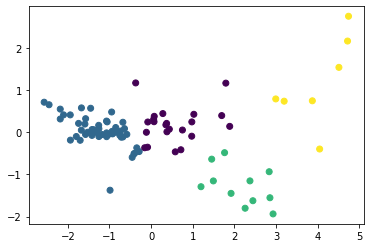

In [ ]:
from sklearn import cluster, tree, decomposition

# Let's try arbitrarily 4 clusters 
km = cluster.KMeans(n_clusters=4)
property_group2['cluster'] = km.fit_predict(property_group2[features])

# Principal Component Analysis (PCA) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set.
# Principal Component Analysis (PCA) is used for Visualizing High-Dimensional Data.
pca = decomposition.PCA()
property_group2['x'] = pca.fit_transform(property_group2[features])[:, 0]
property_group2['y'] = pca.fit_transform(property_group2[features])[:, 1]
plt.scatter(property_group2['x'], property_group2['y'], c=property_group2['cluster'])
plt.show()

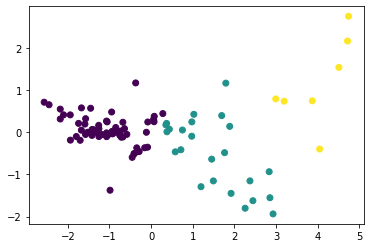

In [ ]:
# Let's try arbitrarily 3 clusters 
km = cluster.KMeans(n_clusters=3)
property_group2['cluster'] = km.fit_predict(property_group2[features])

# Principal Component Analysis (PCA) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set.
# Principal Component Analysis (PCA) is used for Visualizing High-Dimensional Data.
pca = decomposition.PCA()
property_group2['x'] = pca.fit_transform(property_group2[features])[:, 0]
property_group2['y'] = pca.fit_transform(property_group2[features])[:, 1]
plt.scatter(property_group2['x'], property_group2['y'], c=property_group2['cluster'])
plt.show()

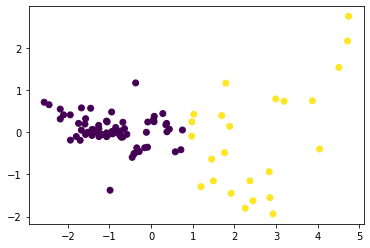

In [ ]:
# Let's try arbitrarily 2 clusters 
km = cluster.KMeans(n_clusters=2)
property_group2['cluster'] = km.fit_predict(property_group2[features])

# Principal Component Analysis (PCA) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set.
# Principal Component Analysis (PCA) is used for Visualizing High-Dimensional Data.
pca = decomposition.PCA()
property_group2['x'] = pca.fit_transform(property_group2[features])[:, 0]
property_group2['y'] = pca.fit_transform(property_group2[features])[:, 1]
plt.scatter(property_group2['x'], property_group2['y'], c=property_group2['cluster'])
plt.show()

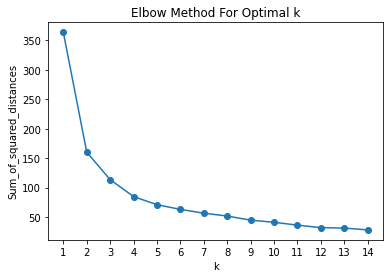

In [ ]:
#Elbow Method
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(property_group2[features])
    # Get sum of square distances by applying km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
#plt.yticks(Sum_of_squared_distances)
plt.show()

In [ ]:
#Shilhoutte Coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(property_group2[features])
    label = kmeans.labels_
    sil_coeff = silhouette_score(property_group2[features], label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5451798058647649
For n_clusters=3, The Silhouette Coefficient is 0.4806497972761709
For n_clusters=4, The Silhouette Coefficient is 0.4137021828929871
For n_clusters=5, The Silhouette Coefficient is 0.3134428725295544
For n_clusters=6, The Silhouette Coefficient is 0.31032536782697273
For n_clusters=7, The Silhouette Coefficient is 0.301526460262324
For n_clusters=8, The Silhouette Coefficient is 0.31033279330154045
For n_clusters=9, The Silhouette Coefficient is 0.2914794517773829
For n_clusters=10, The Silhouette Coefficient is 0.27305131529927457


**Jumlah Cluster yang dipilih**

Dari nilai koefisien siluet dan visualisasi elbow method, jumlah kluster yang dipilih adalah 3, karena memiliki nilai koefisien siluet yang cukup tinggi dan secara visual perubahan nilai jumlah jarak kuadrat pada metode elbow mulai melandai.  

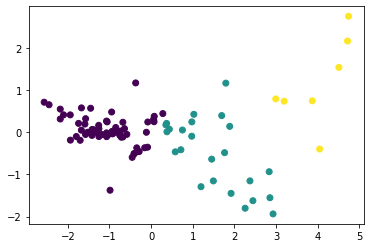

In [ ]:
km = cluster.KMeans(n_clusters=3)
property_group2['cluster'] = km.fit_predict(property_group2[features])

pca = decomposition.PCA()
property_group2['x'] = pca.fit_transform(property_group2[features])[:, 0]
property_group2['y'] = pca.fit_transform(property_group2[features])[:, 1]
plt.scatter(property_group2['x'], property_group2['y'], c=property_group2['cluster'])
plt.show()

In [ ]:
property_group3 = property_group.merge(property_group2[['Location','cluster']]).groupby('cluster').mean() #for every column
property_group3.reset_index(level=0, inplace=True)
property_group3

,cluster,Price,Bathrooms,Car Parks,Room_Number
0,0,1.110637e+06,2.724531,1.871726,3.489507
1,1,2.476372e+06,4.877715,2.434414,5.449244
2,2,3.946592e+06,5.619048,4.761905,6.309524


**Temuan:**

Dari hasil kluster di atas dapat diketahui bahwa nilai kluster ini menandakan grup tipe properti dari yang paling kecil di kluster 0 dengan nilai keseluruhan paling kecil, kemudian properti sedang di kluster 1 dan terakhir properti besar dengan nilai keseluruhan paling tinggi.


In [ ]:
# create a list of our conditions
conditions = [
    (property_group3['cluster'] == 0),
    (property_group3['cluster'] == 1),
    (property_group3['cluster'] == 2)
    ]

# create a list of the values we want to assign for each condition
values = ['Small Property', 'Medium Property', 'Large Property']

# create a new column and use np.select to assign values to it using our lists as arguments
property_group3['cluster'] = np.select(conditions, values)

# display updated DataFrame
property_group3

,cluster,Price,Bathrooms,Car Parks,Room_Number
0,Small Property,1.110637e+06,2.724531,1.871726,3.489507
1,Medium Property,2.476372e+06,4.877715,2.434414,5.449244
2,Large Property,3.946592e+06,5.619048,4.761905,6.309524
